# Import all relevant libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from mlxtend.frequent_patterns import apriori, association_rules

In [152]:
df=pd.read_csv('mhs.csv') # read the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# Data Cleaning

In [154]:
duplicate=df[df.duplicated(keep=False)]#check for duplicate rows
duplicate

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.00,98.0,80,high risk
1010,55,120,90,18.00,98.0,60,high risk
1011,35,85,60,19.00,98.0,86,high risk
1012,43,120,90,18.00,98.0,70,high risk


In [155]:
df.isnull().sum() # checking for null values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# EDA

In [157]:
labelEncode= LabelEncoder() # Label Encoder

In [158]:
df['RiskLevel'] = labelEncode.fit_transform(df['RiskLevel']) # creating a new encoded column 

In [159]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


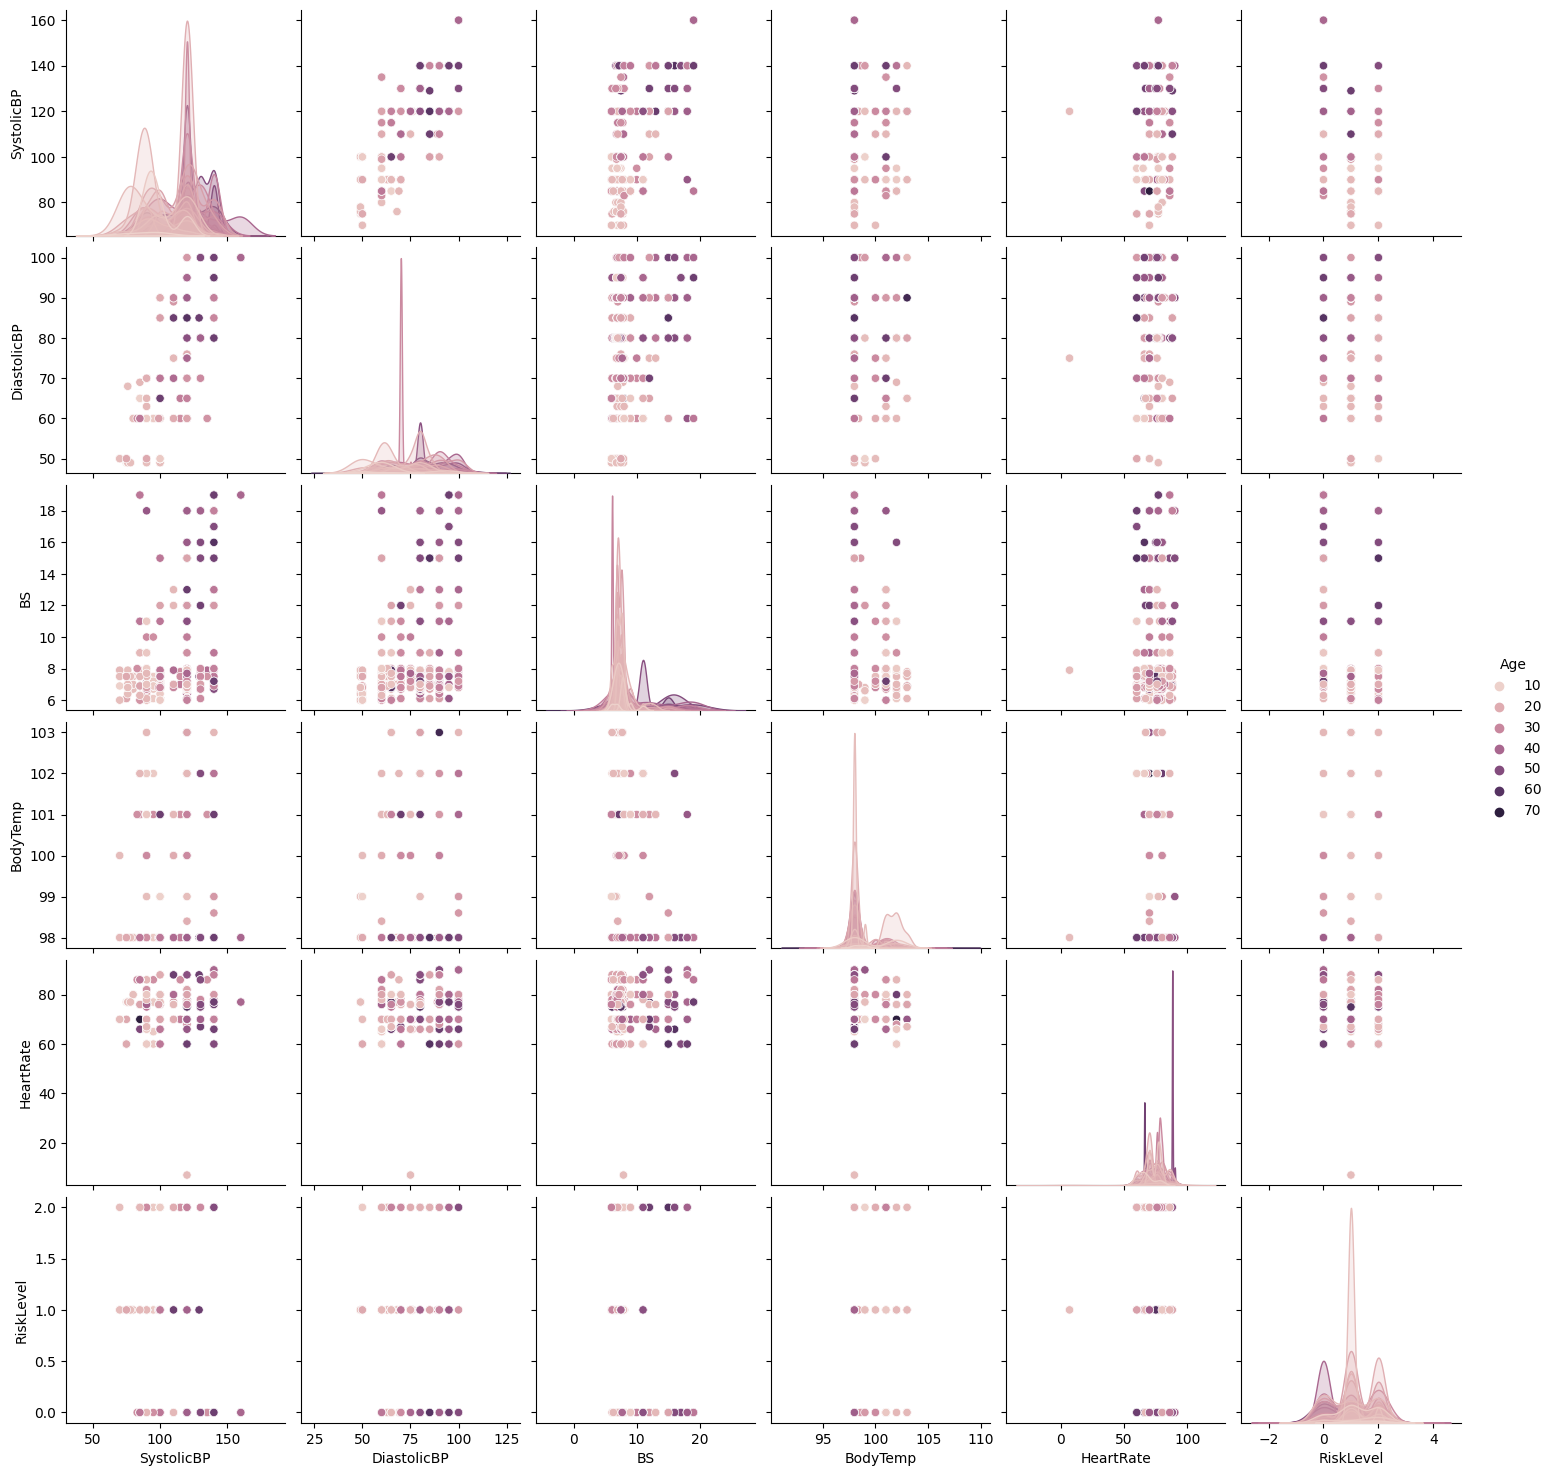

In [160]:
sns.pairplot(df, hue= 'Age') #exploring the age variable
plt.show()

In [162]:
df['HeartRate'].min() #checking for the lowest heartrate

7

In [166]:
df[df['HeartRate'] <=27] #lowest heart rate ever recorded is 27

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,1
908,16,120,75,7.9,98.0,7,1


In [171]:
df.drop(df[df['HeartRate'] ==7].index, axis= 0, inplace= True) # droped the outliers

## Correlation 

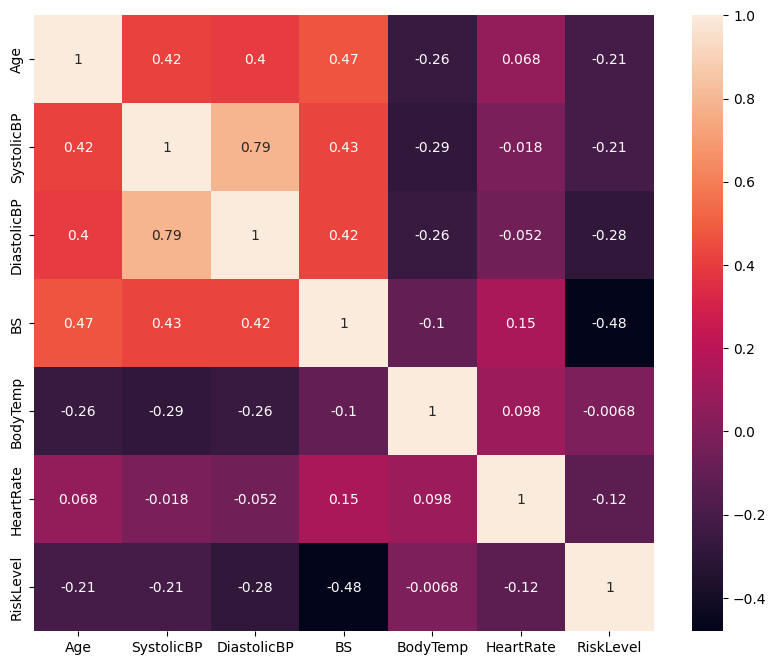

In [174]:
%matplotlib inline # heatmap to show the closely correlated variables
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(df.corr(), annot= True)
plt.show()


# TASK ONE: Using Linear Regression

In [175]:
features_df = df.drop(['SystolicBP'], axis=1 ) # dropping the target column from the main dataset

In [176]:
features_df

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,80,15.0,98.0,86,0
1,35,90,13.0,98.0,70,0
2,29,70,8.0,100.0,80,0
3,30,85,7.0,98.0,70,0
4,35,60,6.1,98.0,76,1
...,...,...,...,...,...,...
1009,22,60,15.0,98.0,80,0
1010,55,90,18.0,98.0,60,0
1011,35,60,19.0,98.0,86,0
1012,43,90,18.0,98.0,70,0


In [177]:
target = df['SystolicBP']

In [178]:
## from correlation matrix, best features are age, diastol and bloodsugar

In [179]:
selected_features = features_df[['Age', 'DiastolicBP', 'BS']] # selecting the experimental features

In [180]:
selected_features

,Age,DiastolicBP,BS
0,25,80,15.0
1,35,90,13.0
2,29,70,8.0
3,30,85,7.0
4,35,60,6.1
...,...,...,...
1009,22,60,15.0
1010,55,90,18.0
1011,35,60,19.0
1012,43,90,18.0


# Model Building

## Using selected features

In [182]:
X_train, X_test, y_train, y_test= train_test_split(selected_features, target, test_size= 0.2, random_state= 42)

In [185]:
linear_model =  LinearRegression() # creating a model object

In [186]:
linear_model.fit(X_train, y_train)

LinearRegression()

# Evaluation 

In [188]:
predictions = linear_model.predict(X_test) #predictions on test data





r2score=r2_score(y_test, predictions) #r2 score on predictions

mse=mean_squared_error(y_test, predictions) #mean square error on predictions

mae=mean_absolute_error(y_test, predictions) #mean absolute error on predictions

rmse=np.sqrt(mean_squared_error(y_test,predictions)) #root mean square error on predictions




print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nmean absolute error:{mae:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.5887
mean squared error:129.1531
mean absolute error:9.0976
root mean square error:11.3646


## Using All Features 

In [189]:
X_train, X_test, y_train, y_test= train_test_split(features_df, target, test_size= 0.2, random_state= 42)

In [191]:
linear_model2 =  LinearRegression()

In [192]:
linear_model2.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [193]:
predictions = linear_model2.predict(X_test) #model predictions on test data





r2score=r2_score(y_test, predictions) #r2 score on predictions

mse=mean_squared_error(y_test, predictions) #mean square error on predictions

mae=mean_absolute_error(y_test, predictions) #mean absolute error on predictions

rmse=np.sqrt(mean_squared_error(y_test,predictions)) #root mean square error on predictions




print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nmean absolute error:{mae:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.5990
mean squared error:125.9178
mean absolute error:8.9593
root mean square error:11.2213


# Task 2: Principal Component Analysis

### Using Standard Scaler

In [197]:
scaler = StandardScaler()

In [198]:
# standardizing the data
X_std = scaler.fit_transform(features_df)

In [221]:
## fit PCA into the data
pca = PCA()
pca_data = pca.fit_transform(X_std)

print(f'Variance per component: {pca.explained_variance_ratio_}')

Variance per component: [0.3731001  0.20383747 0.14719373 0.11081852 0.09535191 0.06969827]


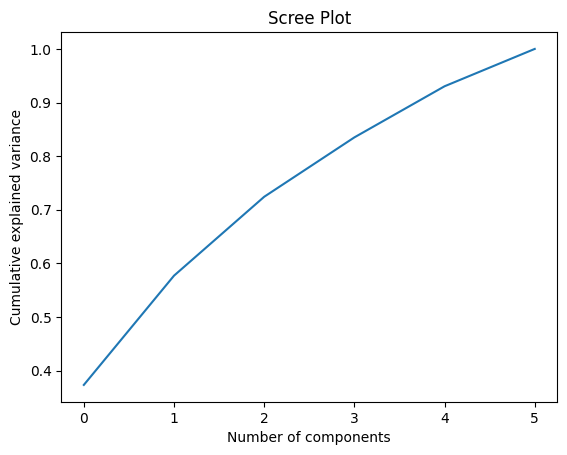

In [222]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #scree plot
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree Plot')
plt.show()

In [223]:
pca_components = pca.components_

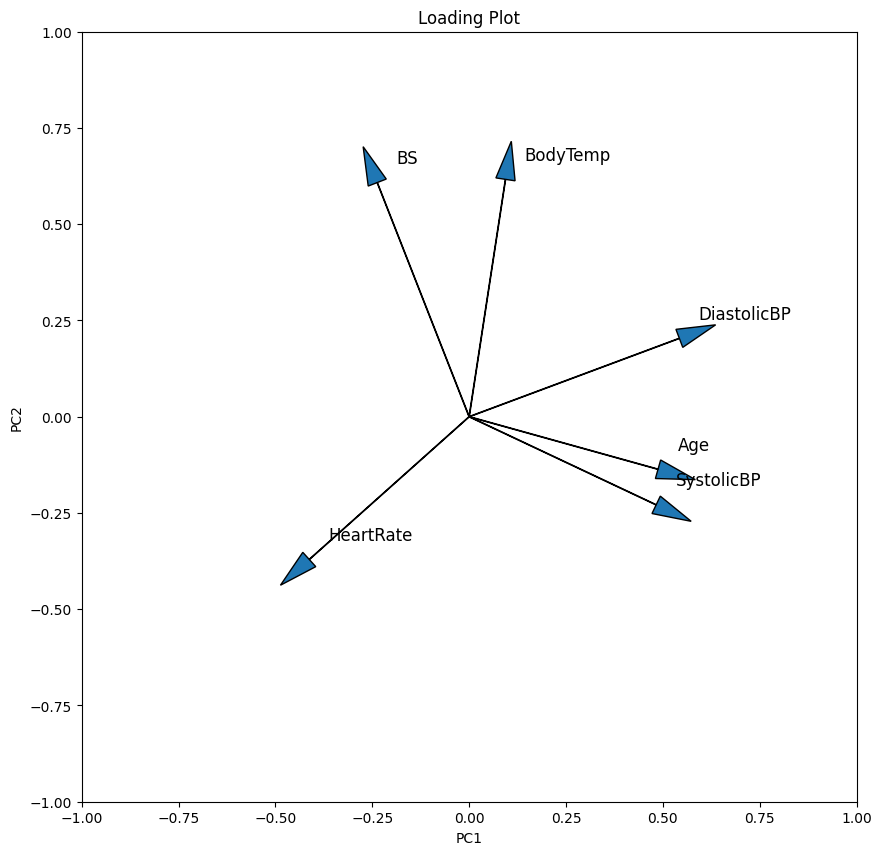

In [224]:
# create a loading plot
fig, ax = plt.subplots(figsize=(10, 10))
for i, (x, y) in enumerate(zip(pca_components[0, :], pca_components[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1)
    ax.text(x + 0.05, y + 0.05, df.columns[i], fontsize=12)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Loading Plot")
plt.show()

In [45]:
pca_data_df = pd.DataFrame(pca_data, columns =['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4'])#transforming pca into dataframe
pca_data_df 

,PCA_1,PCA_2,PCA_3,PCA_4
0,1.805484,1.542191,-0.448551,-1.215457
1,1.985969,-0.159554,0.961240,-0.536477
2,0.029798,1.628697,0.397342,-0.376585
3,0.643521,-0.397186,0.818734,-0.963995
4,-0.651342,-0.079567,-0.684960,-0.313097
...,...,...,...,...
1007,0.927319,1.410007,-0.023480,-1.367601
1008,3.408278,-0.873405,1.711414,0.629611
1009,2.131203,2.017439,-0.723890,-0.784902
1010,3.098679,0.068269,0.964934,-0.041380


## Build Model using PCA

In [46]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(pca_data_df, target, train_size= 0.8, random_state= 42)

In [48]:
linear_pca = LinearRegression()

In [49]:
linear_pca.fit(X_pca_train,y_train) #fitting the pca dataframe into the linear regression model

LinearRegression()

In [50]:
predictions = linear_pca.predict(X_pca_test) #get model predictions on test data



r2score=r2_score(y_test, predictions) #get r2 score on predictions

mse=mean_squared_error(y_test, predictions) #get mean square error on predictions

mae=mean_absolute_error(y_test, predictions) #get mean absolute error on predictions

rmse=np.sqrt(mean_squared_error(y_test,predictions)) #get root mean square error on predictions




print(f'r2 score:{r2score:.4f}\nmean squared error:{mse:.4f}\nmean absolute error:{mae:.4f}\nroot mean square error:{rmse:.4f}')

r2 score:0.4539
mean squared error:171.4777
mean absolute error:10.8999
root mean square error:13.0949


## Task 3: Relationship between Age and Heartrate

In [212]:
age_heart_df= df[['Age', 'HeartRate']] #extracting Age and Heartrate features

In [213]:
age_heart_df

,Age,HeartRate
0,25,86
1,35,70
2,29,80
3,30,70
4,35,76
...,...,...
1009,22,80
1010,55,60
1011,35,86
1012,43,70


In [215]:
#Creating an Age column with the age band
bins = [0, 12,19,39,64,100]
labels = ['Children', 'Teenagers', 'Youths', 'Adults', 'Senior Citizens']
age_heart_df['Age_Group'] = pd.cut(age_heart_df['Age'], bins = bins, labels=labels, right= False)
age_heart_df

/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_4908/481943682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_heart_df['Age_Group'] = pd.cut(age_heart_df['Age'], bins = bins, labels=labels, right= False)


,Age,HeartRate,Age_Group
0,25,86,Youths
1,35,70,Youths
2,29,80,Youths
3,30,70,Youths
4,35,76,Youths
...,...,...,...
1009,22,80,Youths
1010,55,60,Adults
1011,35,86,Youths
1012,43,70,Adults


In [216]:
mean_heartRate = age_heart_df.groupby("Age_Group")['HeartRate'].mean() #getting the mean 
mean_heartRate

Age_Group
Children           70.000000
Teenagers          74.500000
Youths             74.135531
Adults             75.039841
Senior Citizens    77.600000
Name: HeartRate, dtype: float64

In [218]:
mean_heartRate =pd.DataFrame({'AgeGroup':mean_heartRate.index, 'Average_heartrate':mean_heartRate.values}) #convert to dataframe

mean_heartRate

,AgeGroup,Average_heartrate
0,Children,70.000000
1,Teenagers,74.500000
2,Youths,74.135531
3,Adults,75.039841
4,Senior Citizens,77.600000


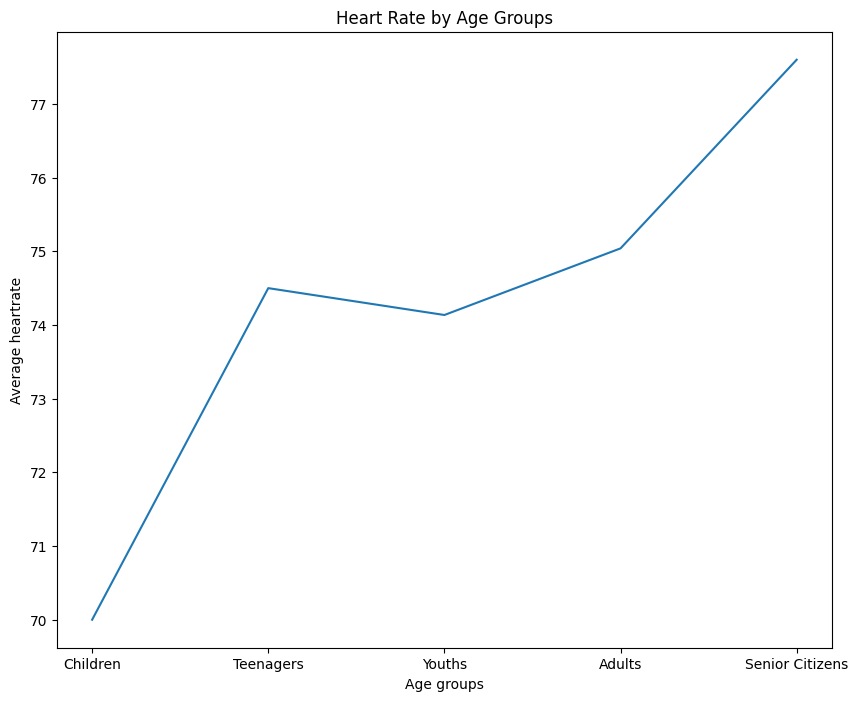

In [219]:
plt.figure(figsize= (10, 8), dpi =100) #line plot for age groups vs average heartrate
sns.lineplot(x= mean_heartRate['AgeGroup'], y= mean_heartRate['Average_heartrate'])
plt.title('Heart Rate by Age Groups')
plt.xlabel('Age groups')
plt.ylabel('Average heartrate')
plt.show()

In [220]:
# Calculate the correlation coefficient between age and heart rate
corr_coef = df['Age'].corr(df['HeartRate'])

# Print the correlation coefficient
print("Correlation coefficient between age and heart rate:", corr_coef)

Correlation coefficient between age and heart rate: 0.06772672390787654


# Task 4: Association Pattern

In [59]:
BP_df = df[['SystolicBP', 'DiastolicBP']] #extracting the target variables
BP_df

,SystolicBP,DiastolicBP
0,130,80
1,140,90
2,90,70
3,140,85
4,120,60
...,...,...
1009,120,60
1010,120,90
1011,85,60
1012,120,90


In [62]:
## create range for both systolic and diastolic
labels=['low', 'normal', 'high']
systolicBins =[0, 110, 140, 200]
diastolicBins = [0, 70, 90, 200]

In [63]:
##map range to columns
BP_df['SystolicBP_range'] = pd.cut(BP_df['SystolicBP'], bins = systolicBins, labels= labels, right =False )
BP_df['DiastolicBP_range'] = pd.cut(BP_df['DiastolicBP'], bins = diastolicBins, labels= labels, right =False )


/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_4908/3215247528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BP_df['SystolicBP_range'] = pd.cut(BP_df['SystolicBP'], bins = systolicBins, labels= labels, right =False )
/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_4908/3215247528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BP_df['DiastolicBP_range'] = pd.cut(BP_df['DiastolicBP'], bins = diastolicBins, labels= labels, right =False )


In [64]:
BP_df

,SystolicBP,DiastolicBP,SystolicBP_range,DiastolicBP_range
0,130,80,normal,normal
1,140,90,high,high
2,90,70,low,normal
3,140,85,high,normal
4,120,60,normal,low
...,...,...,...,...
1009,120,60,normal,low
1010,120,90,normal,high
1011,85,60,low,low
1012,120,90,normal,high


In [65]:
## Extract Encoded Columns

In [66]:
BP_df = BP_df[['SystolicBP_range', 'DiastolicBP_range']].rename(columns ={'SystolicBP_range': 'systolicBP', 'DiastolicBP_range': 'DiastolicBP'})

In [67]:
BP_df

,systolicBP,DiastolicBP
0,normal,normal
1,high,high
2,low,normal
3,high,normal
4,normal,low
...,...,...
1009,normal,low
1010,normal,high
1011,low,low
1012,normal,high


In [68]:
#Hot encoding the columns
BP_df= pd.get_dummies(BP_df)
BP_df

,systolicBP_low,systolicBP_normal,systolicBP_high,DiastolicBP_low,DiastolicBP_normal,DiastolicBP_high
0,0,1,0,0,1,0
1,0,0,1,0,0,1
2,1,0,0,0,1,0
3,0,0,1,0,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1009,0,1,0,1,0,0
1010,0,1,0,0,0,1
1011,1,0,0,1,0,0
1012,0,1,0,0,0,1


In [70]:
#most frequent dataset
itemsets = apriori(BP_df, min_support=0.001, use_colnames= True)
itemsets['cardinality'] = itemsets['itemsets'].map(lambda x: len(x))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [71]:
itemsets

,support,itemsets,cardinality
0,0.339921,(systolicBP_low),1
1,0.531621,(systolicBP_normal),1
2,0.128458,(systolicBP_high),1
3,0.317194,(DiastolicBP_low),1
4,0.410079,(DiastolicBP_normal),1
5,0.272727,(DiastolicBP_high),1
6,0.266798,"(systolicBP_low, DiastolicBP_low)",2
7,0.063241,"(systolicBP_low, DiastolicBP_normal)",2
8,0.009881,"(systolicBP_low, DiastolicBP_high)",2
9,0.050395,"(DiastolicBP_low, systolicBP_normal)",2


In [72]:
# Rules
rules = association_rules(itemsets, metric= 'confidence', min_threshold = 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(systolicBP_low),(DiastolicBP_low),0.339921,0.317194,0.266798,0.784884,2.474462,0.158978,3.174127,0.902728
1,(DiastolicBP_low),(systolicBP_low),0.317194,0.339921,0.266798,0.841121,2.474462,0.158978,4.154615,0.872680
2,(DiastolicBP_normal),(systolicBP_normal),0.410079,0.531621,0.333992,0.814458,1.532028,0.115986,2.524383,0.588673
3,(systolicBP_normal),(DiastolicBP_normal),0.531621,0.410079,0.333992,0.628253,1.532028,0.115986,1.586887,0.741430
4,(DiastolicBP_high),(systolicBP_normal),0.272727,0.531621,0.147233,0.539855,1.015489,0.002246,1.017895,0.020973
5,(systolicBP_normal),(DiastolicBP_high),0.531621,0.272727,0.147233,0.276952,1.015489,0.002246,1.005842,0.032566
6,(DiastolicBP_high),(systolicBP_high),0.272727,0.128458,0.115613,0.423913,3.300000,0.080579,1.512864,0.958333
7,(systolicBP_high),(DiastolicBP_high),0.128458,0.272727,0.115613,0.900000,3.300000,0.080579,7.272727,0.799698


# Task 5: Cluster of Patients

In [74]:
#Data points for systolic
X1= np.array(df['SystolicBP'])

In [133]:
X1= X1.reshape(-1, 1)

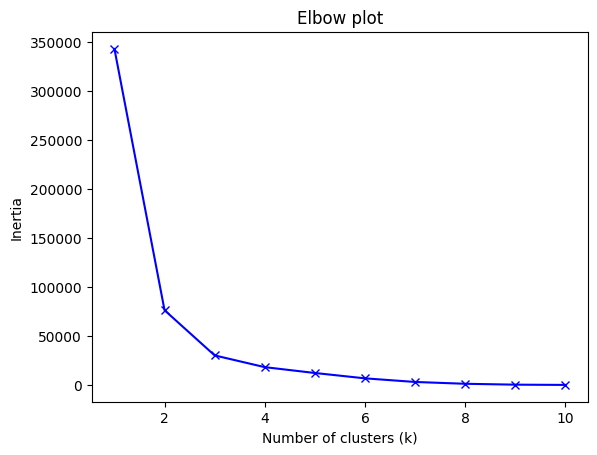

In [134]:
# Create empty list for the inertia values
inertias = []

# Define range of K values to test
k_values = range(1, 11)

# Fit KMeans for each value of K and append inertia to list
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X1)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [135]:
# Choose the number of clusters
k = 3

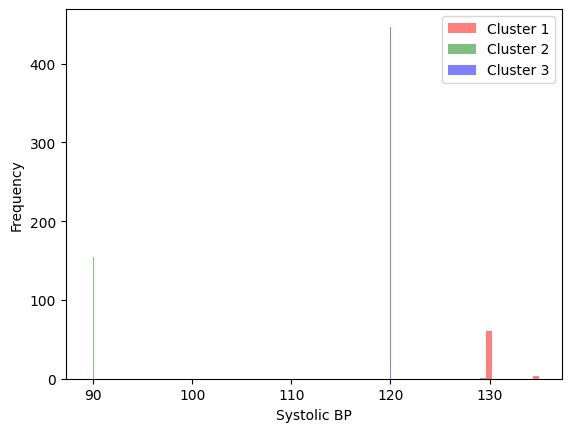

Cluster 1 has 64 patients with a mean systolic BP of 130.22
Cluster 2 has 154 patients with a mean systolic BP of 90.00
Cluster 3 has 447 patients with a mean systolic BP of 120.00


In [136]:
# Get the cluster labels and centroids for each patient
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Extract the data for each cluster
cluster1_data = X1[labels == 0].ravel()
cluster2_data = X1[labels == 1].ravel()
cluster3_data = X1[labels == 2].ravel()

# Visualize the clusters using a histogram
plt.hist(cluster1_data, color='red', alpha=0.5, label='Cluster 1')
plt.hist(cluster2_data, color='green', alpha=0.5, label='Cluster 2')
plt.hist(cluster3_data, color='blue', alpha=0.5, label='Cluster 3')
plt.legend()
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.show()

# Analyze the characteristics of each cluster
for i in range(k):
    cluster_data = X1[labels == i]
    print(f"Cluster {i+1} has {len(cluster_data)} patients with a mean systolic BP of {centroids[i][0]:.2f}")



# Task 6: Correlation between age and Systolic

In [145]:
corr = np.corrcoef(df['Age'], df['SystolicBP'])[0, 1] #using the correlation coefficient method
print(f"The correlation between age and systolic BP is {corr:.2f}")

The correlation between age and systolic BP is 0.42


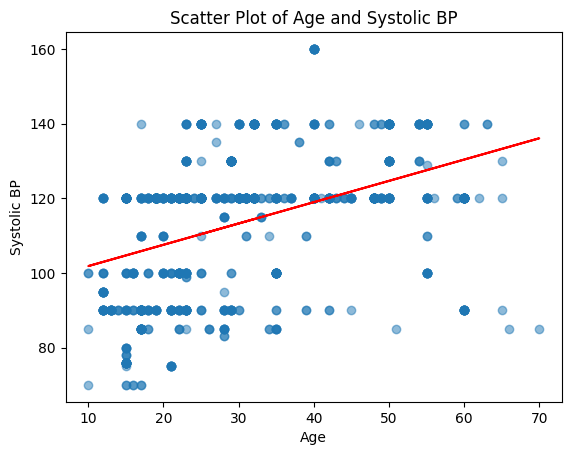

In [149]:
# Create a scatter plot of age and systolic BP
plt.scatter(df['Age'], df['SystolicBP'], alpha=0.5)

# Calculate the regression line
m, b = np.polyfit(df['Age'], df['SystolicBP'], 1)
plt.plot(df['Age'], m*df['Age'] + b, color='red')

# Set the plot labels and title
plt.xlabel('Age')
plt.ylabel('Systolic BP')
plt.title('Scatter Plot of Age and Systolic BP')

# Show the plot
plt.show()